In [1]:
import numpy as np
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

## Get/Prepare the data
Let us create a training and testing datasets.  
The data is created randomly so the testing and training datasets do not intersect  
The data will be normalized to the [0,1] interval

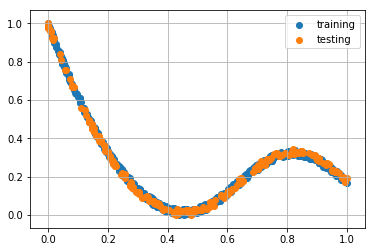

In [2]:
import data  # hand-made library with a couple of functions
# Create the data
IN_train, OUT_train = data.gen_data_cool(300, norm=True)
IN_test, OUT_test = data.gen_data_cool(100, norm=True)

# Visualize the data
fig, ax = plt.subplots()
ax.scatter(IN_train, OUT_train, label='training')
ax.scatter(IN_test, OUT_test, label='testing')
ax.legend()
plt.show()

## Build the model
Let us create a model with a single hidden layer formed by 5 sigmoid neurons. It would look something like this:
<img src="test.svg" />
The output of the NN can be calculated as follows:
$$\text{Output} = \vec{a}_3 = \sigma\left( W_3\cdot\vec{a}_2 +b_3 \right)$$
where $\vec{a}_2$ is the output (activation) of the second hidden layer:
$$\vec{a}_2 = \sigma\left( W_2\cdot\vec{a}_1 +\vec{b}_2 \right)$$
where $\vec{a}_1$ is the output of the first hidden layer:
$$\vec{a}_1 = \sigma\left( W_1\cdot\vec{v}_{\text{input}} +\vec{b}_1 \right)$$

The NN, then, will be defined by two weight matrices ($W_1$ and $W_2$ in the figure) and two biases arrays (one for the hidden layer and one for the output layer) with shapes:
$$W_1\rightarrow(1,2) \qquad W_2\rightarrow(2,5) \qquad W_3\rightarrow(5,1)$$
$$\vec{b}_1\rightarrow(1,2) \qquad \vec{b}_2\rightarrow(1,5) \qquad \vec{b}_3\rightarrow(1,1)$$

In [3]:
model = keras.Sequential([keras.layers.Dense(2, activation=None, input_shape=(1,)),
                          keras.layers.Dense(5, activation=tf.nn.sigmoid),
                          keras.layers.Dense(1, activation=None) ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['accuracy'])

## Explore the model, initialized randomly

In [5]:
#
# Print the model weights and biases
#
for W in model.get_weights():
    print(W.shape)
    print(W)
    print('-----------')

(1, 2)
[[-0.95511264 -0.97596085]]
-----------
(2,)
[0. 0.]
-----------
(2, 5)
[[ 0.2667383  -0.01757365  0.2371906   0.7482517  -0.29548848]
 [-0.56546795 -0.69725007  0.27329445  0.77274394  0.49973905]]
-----------
(5,)
[0. 0. 0. 0. 0.]
-----------
(5, 1)
[[-0.5224278 ]
 [ 0.6895075 ]
 [ 0.9359746 ]
 [ 0.91479254]
 [-0.40641236]]
-----------
(1,)
[0.]
-----------


## Training

In [10]:
# Training
from time import time
told = time()
history = model.fit(IN_train, OUT_train, epochs=1000,
                    validation_data = (IN_test,OUT_test),
                    verbose=0)
print('Training done in: %.3f s'%(time()-told))

Training done in: 18.791 s


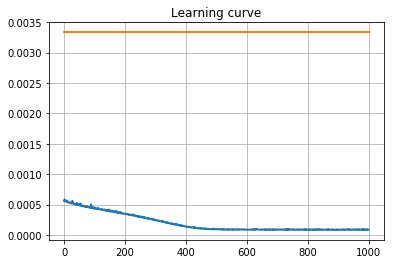

In [15]:
# plot learning curve
err = history.history['loss']
acc = history.history['accuracy']

fig, ax = plt.subplots()
ax.plot(err,label='loss',lw=2)
ax.plot(acc,label='loss',lw=2)

ax.set_title('Learning curve')
plt.show()

In [12]:
# Prediction over the whole domain
mx, Mx = np.min(IN_train),np.max(IN_train)
x_predict = np.linspace(mx, Mx,500)
x_predict = data.lineal_norm(x_predict)

y_predict = model.predict(x_predict)
y_predict = data.lineal_norm(y_predict)   # should be unnecessary


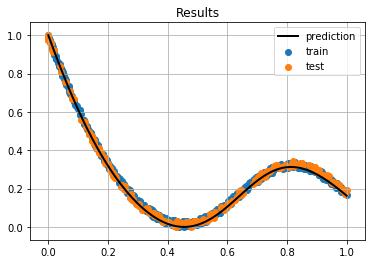

In [13]:
fig, ax = plt.subplots()
ax.scatter(IN_train, OUT_train, label='train')
ax.scatter(IN_test,  OUT_test,label='test')
ax.plot(x_predict, y_predict,'k',lw=2, label='prediction')
ax.legend()
ax.set_title('Results')
plt.show()

In [ ]:
# Save result
model.save('my_first_NN.h5')